<a href="https://colab.research.google.com/github/harshith-118/MachineLearningProjects/blob/main/Credit_Card_Defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [ ]:
dataset = pd.read_excel("default_of_credit_card_clients_0.xlsx")
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,0,0,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
dataset.drop(columns="ID",inplace=True)

In [ ]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,0,0,0,0,0,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
dataset.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
dataset.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,-0.032061,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.050180,0.055610,0.045278,0.044117,0.033551,0.023124,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,-0.011724,-0.009915,0.000717,-0.004039,-0.002772,0.002050,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.170745,-0.034475,0.050180,-0.011724,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,0.009137,0.013307,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.197136,-0.044750,0.055610,-0.009915,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,0.015932,0.022950,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.191323,-0.041227,0.045278,0.000717,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,-0.000968,0.002447,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,-0.180629,-0.039737,0.044117,-0.004039,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,-0.012569,0.002670,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
PAY_5,-0.170045,-0.038533,0.033551,-0.002772,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,-0.018581,-0.008614,0.003377,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850


In [ ]:
import seaborn as sns

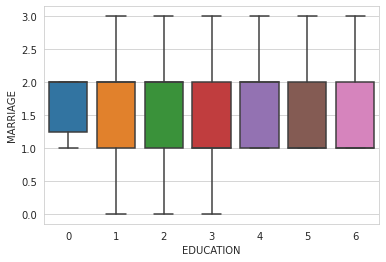

In [ ]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'EDUCATION', y = 'MARRIAGE', data = dataset)

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8225,20000,1,1,2,33,1,2,2,2,2,2,17971,17399,19057,18453,19755,19288,0,2260,0,1600,0,644,0
10794,20000,2,2,2,35,0,0,2,0,0,0,16528,19347,18600,19000,19000,20000,3400,0,1000,0,1000,0,0
9163,230000,2,1,1,44,1,0,0,0,0,0,3884,949,2864,933,0,0,949,2873,933,0,0,0,0
26591,100000,1,2,1,42,0,0,0,0,0,0,98430,99998,16138,17758,18774,20272,5000,2000,2000,2000,2000,2000,0
6631,150000,1,1,2,29,0,0,0,0,0,0,4583,6917,831,6469,5138,7810,6989,833,6488,5153,7833,7130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24308,420000,1,1,1,43,0,0,0,0,0,0,3542,2967,2977,2987,3624,3165,3010,3035,3029,3637,3222,3025,0
6495,50000,2,5,1,28,0,0,0,0,0,0,9014,9608,12025,16025,0,0,3000,3000,4000,0,0,0,0
4739,230000,2,2,2,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8618,0
15393,390000,2,3,1,58,0,0,0,0,0,0,1186,15523,0,609,0,0,15657,0,609,0,0,0,0


In [ ]:
test_dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10,200000,2,3,2,34,0,0,2,0,0,0,11073,9787,5535,2513,1828,3731,2306,12,50,300,3738,66,0
13,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
19,180000,2,1,2,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,50000,2,3,1,47,0,0,0,0,0,0,650,3415,3416,2040,30430,257,3415,3421,2044,30430,257,0,0
40,360000,1,1,2,33,0,0,0,0,0,0,218668,221296,206895,628699,195969,179224,10000,7000,6000,188840,28000,4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29977,420000,1,1,2,34,0,0,0,0,0,0,131939,136721,140011,141695,144839,147954,7000,7000,5500,5500,5600,5000,0
29984,30000,1,2,2,38,0,0,0,0,0,0,315,923,2939,1993,1907,3319,923,2977,1999,3057,3319,1000,0
29991,210000,1,2,1,34,3,2,2,2,2,2,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1
29992,10000,1,3,1,43,0,0,0,0,0,0,8802,10400,0,0,0,0,2000,0,0,0,0,0,0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('default payment next month')
test_labels = test_features.pop('default payment next month')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
      layers.Dense(256, activation='relu',kernel_initializer='he_normal'),
      layers.Dense(2,activation='sigmoid',kernel_initializer='he_normal')
  ])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


CPU times: user 7min 38s, sys: 34.6 s, total: 8min 13s
Wall time: 5min 19s


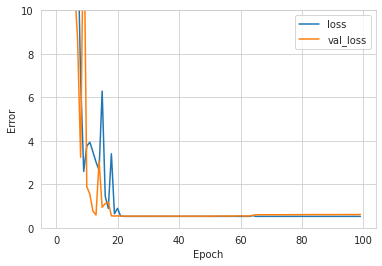

In [ ]:
plot_loss(history)

In [ ]:
loss, acc = dnn_model.evaluate(test_features,test_labels, verbose=0)
print('Test Accuracy: %.3f' % acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Test Accuracy: 0.775


In [ ]:
test_result={}
test_result['Loss Function Value']=loss

In [ ]:
pd.DataFrame(test_result, index=['Sparse Categorical Crossentropy [risky and non-risky]']).T

,Sparse Categorical Crossentropy [risky and non-risky]
Accuracy Value,0.534749
